In [30]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [31]:
import zipfile
zip_ref=zipfile.ZipFile('/content/drive/MyDrive/Monument_Final_Data/testing.zip')
zip_ref.extractall('/content/drive/MyDrive/Monument_Final_Data/test')
zip_ref.close()

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import cv2
import os
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"
import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import confusion_matrix, classification_report

import tensorflow as tf
from keras.models import Sequential
from keras.layers import Activation, BatchNormalization, Conv2D, Dense, Dropout, Flatten, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras.losses import CategoricalCrossentropy
from keras.regularizers import l2
from keras.callbacks import ReduceLROnPlateau, EarlyStopping

In [16]:
train_dataset_path = '/content/drive/MyDrive/Monument_Final_Data/train'
validation_dataset_path = '/content/drive/MyDrive/Monument_Final_Data/val'

In [17]:
IMG_WIDTH = 224
IMG_HEIGHT = 224
BATCH_SIZE = 16

In [18]:
train_datagen = ImageDataGenerator(rescale=1.0/255)
train_generator = train_datagen.flow_from_directory(train_dataset_path,
                                                   target_size=(IMG_WIDTH, IMG_HEIGHT),
                                                   batch_size=BATCH_SIZE,
                                                   class_mode='categorical',
                                                   shuffle=True)

validation_datagen = ImageDataGenerator(rescale=1.0/255)
validation_generator = validation_datagen.flow_from_directory(validation_dataset_path,
                                                             target_size=(IMG_WIDTH, IMG_HEIGHT),
                                                             batch_size=BATCH_SIZE,
                                                             class_mode='categorical',
                                                             shuffle=True)

Found 10297 images belonging to 15 classes.
Found 746 images belonging to 15 classes.


In [19]:
labels = {value: key for key, value in train_generator.class_indices.items()}

print("Label Mappings for classes present in the training and validation datasets\n")
for key, value in labels.items():
    print(f"{key} : {value}")

Label Mappings for classes present in the training and validation datasets

0 : Amber Fort
1 : Brihadeeswarar Temple
2 : Fatehpur Sikri
3 : Golden Temple
4 : Hawa Mahal
5 : Humayun Tomb
6 : Lotus Bahai Temple
7 : Meenakshi Amman Temple
8 : Mysore Palace
9 : Purana Qila
10 : Qutab Minar, Delhi
11 : Safdarjung's Tomb
12 : Sanchi Stupa
13 : Taj Mahal
14 : Virupaksha Temple


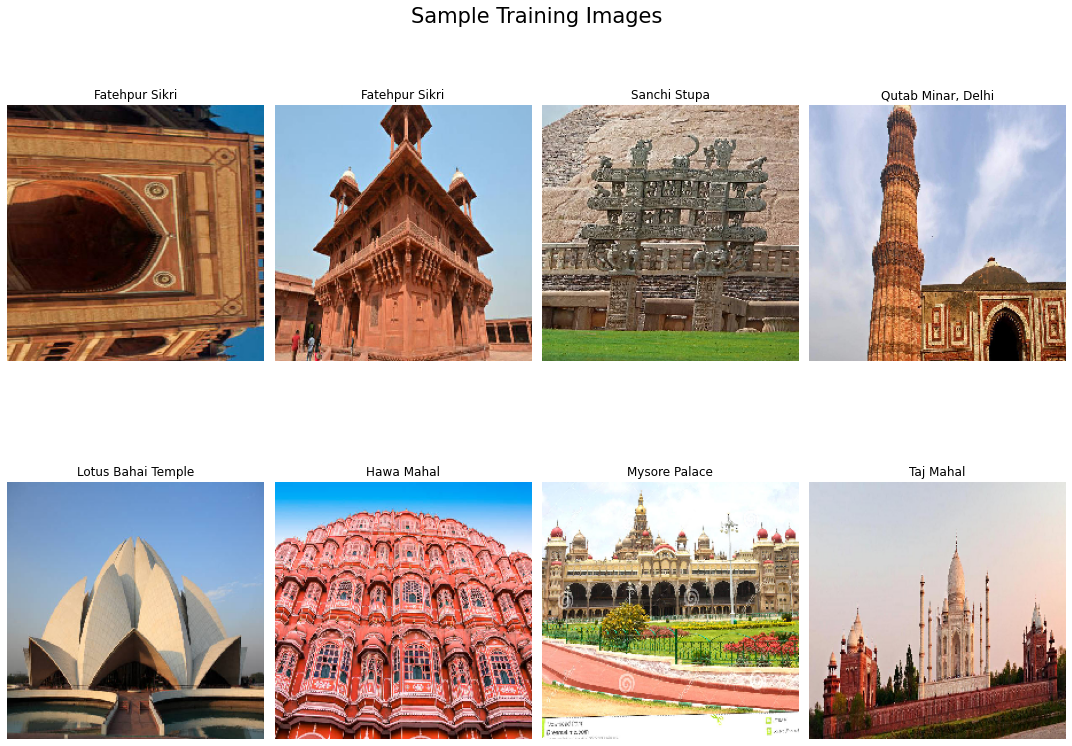

In [20]:
fig, ax = plt.subplots(nrows=2, ncols=4, figsize=(15, 12))
idx = 0

for i in range(2):
    for j in range(4):
        label = labels[np.argmax(train_generator[0][1][idx])]
        ax[i, j].set_title(f"{label}")
        ax[i, j].imshow(train_generator[0][0][idx][:, :, :])
        ax[i, j].axis("off")
        idx += 1

plt.tight_layout()
plt.suptitle("Sample Training Images", fontsize=21)
plt.show()

In [21]:
# train_generator = train_generator.cache().shuffle(1000).prefetch(
#     buffer_size=tf.data.AUTOTUNE)  # This improves the performance in pipeline
# validation_generator = validation_generator.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [22]:
def create_model():
    shape_img=(IMG_WIDTH, IMG_HEIGHT, 3)
    # Building the Model
    model = Sequential()

    model.add(Conv2D(filters = 64, kernel_size = (4,4),padding='same', activation ='relu', input_shape = shape_img))
    model.add(MaxPooling2D(pool_size=(2,2)))

    model.add(Conv2D(filters = 64, kernel_size = (3,3), padding='same',activation ='relu', kernel_regularizer = 'l2'))
    model.add(MaxPooling2D(pool_size=(2,2)))


    model.add(Conv2D(filters = 32, kernel_size = (3,3), padding='same',activation ='relu', kernel_regularizer = 'l2'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    
    model.add(Conv2D(filters = 64, kernel_size = (2,2), padding='same',activation ='relu', kernel_regularizer = 'l2'))
    model.add(MaxPooling2D(pool_size=(2,2)))

    model.add(Conv2D(filters = 32, kernel_size = (3,3), padding='same',activation ='relu', kernel_regularizer = 'l2'))
    model.add(MaxPooling2D(pool_size=(2,2)))

    model.add(Conv2D(filters = 32, kernel_size = (3,3), padding='same',activation ='relu', kernel_regularizer = 'l2'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(BatchNormalization())

    model.add(Flatten())
    model.add(Dense(128, activation = "relu"))
    model.add(Dense(64, activation = "relu"))
    model.add(Dense(15, activation = "softmax"))

    return model
  
    
    # model = Sequential()

    # model.add(Conv2D(32,(4,4),input_shape = shape_img,activation = 'relu'))
    # model.add(MaxPooling2D(pool_size=(2,2)))

    # model.add(Conv2D(64,(3,3),activation = 'relu'))
    # model.add(MaxPooling2D(pool_size=(2,2)))
    # model.add(Dropout(0.2))

    # model.add(Flatten())
    # model.add(Dense(128,activation='relu'))
    # model.add(Dense(15, activation='softmax'))
    
    # return model

    
# model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(224,224,3)))
# model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

# model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
# model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

# model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
# model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

# model.add(Flatten())

# model.add(Dense(128,activation='relu'))
# model.add(Dropout(0.1))
# model.add(Dense(64,activation='relu'))
# model.add(Dropout(0.1))
# model.add(Dense(15,activation='softmax'))

In [23]:
cnn_model = create_model()

In [24]:
print(cnn_model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 224, 224, 64)      3136      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 112, 112, 64)     0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 112, 112, 64)      36928     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 56, 56, 64)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 56, 56, 32)        18464     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 28, 28, 32)      

In [ ]:
# reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=np.sqrt(0.1), patience=5)

In [ ]:
# optimizer = Adam(learning_rate=0.001)

In [25]:
cnn_model.compile(loss = 'categorical_crossentropy', optimizer = Adam(0.001),metrics=['accuracy'])

In [26]:
history = cnn_model.fit(train_generator, epochs=10,verbose=1, validation_data=validation_generator)

Epoch 1/10
644/644 [==============================] - 148s 227ms/step - loss: 2.8983 - accuracy: 0.1912 - val_loss: 2.2553 - val_accuracy: 0.3137
Epoch 2/10
644/644 [==============================] - 145s 225ms/step - loss: 2.1063 - accuracy: 0.3429 - val_loss: 1.8626 - val_accuracy: 0.4088
Epoch 3/10
644/644 [==============================] - 143s 222ms/step - loss: 1.8417 - accuracy: 0.4266 - val_loss: 1.6891 - val_accuracy: 0.4826
Epoch 4/10
644/644 [==============================] - 144s 224ms/step - loss: 1.6340 - accuracy: 0.5004 - val_loss: 1.4824 - val_accuracy: 0.5777
Epoch 5/10
644/644 [==============================] - 144s 224ms/step - loss: 1.4617 - accuracy: 0.5558 - val_loss: 1.5705 - val_accuracy: 0.5536
Epoch 6/10
644/644 [==============================] - 145s 226ms/step - loss: 1.3120 - accuracy: 0.5978 - val_loss: 1.4711 - val_accuracy: 0.5791
Epoch 7/10
644/644 [==============================] - 148s 231ms/step - loss: 1.2092 - accuracy: 0.6380 - val_loss: 1.3840 -

In [27]:
cnn_model.save("/content/drive/MyDrive/Monument_Final_Data/baseline_model_72pct_acc.h5")

In [28]:
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

train_loss = history.history['loss']
val_loss = history.history['val_loss']

# learning_rate = history.history['lr']

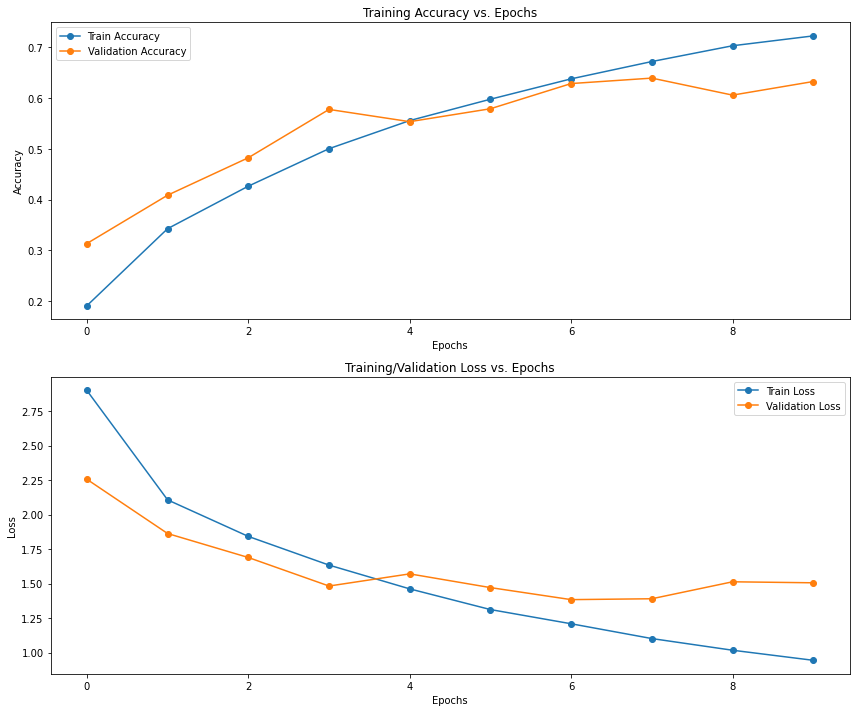

In [29]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(12, 10))

ax[0].set_title('Training Accuracy vs. Epochs')
ax[0].plot(train_accuracy, 'o-', label='Train Accuracy')
ax[0].plot(val_accuracy, 'o-', label='Validation Accuracy')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')
ax[0].legend(loc='best')

ax[1].set_title('Training/Validation Loss vs. Epochs')
ax[1].plot(train_loss, 'o-', label='Train Loss')
ax[1].plot(val_loss, 'o-', label='Validation Loss')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss')
ax[1].legend(loc='best')

# ax[2].set_title('Learning Rate vs. Epochs')
# ax[2].plot(learning_rate, 'o-', label='Learning Rate')
# ax[2].set_xlabel('Epochs')
# ax[2].set_ylabel('Loss')
# ax[2].legend(loc='best')

plt.tight_layout()
plt.show()

In [33]:
# import shutil
# shutil.unpack_archive('/content/drive/MyDrive/Monument_Final_Data/testing.zip','/content/drive/MyDrive/Monument_Final_Data/')

In [34]:
test_dataset = '/content/drive/MyDrive/Monument_Final_Data/test'

In [35]:
test_datagen = ImageDataGenerator(rescale=1.0/255)

test_generator = test_datagen.flow_from_directory(test_dataset,
                                                 shuffle=False,
                                                 batch_size=BATCH_SIZE,
                                                 target_size = (IMG_WIDTH, IMG_HEIGHT),
                                                 class_mode='categorical')

Found 251 images belonging to 15 classes.


16/16 [==============================] - 2s 132ms/step


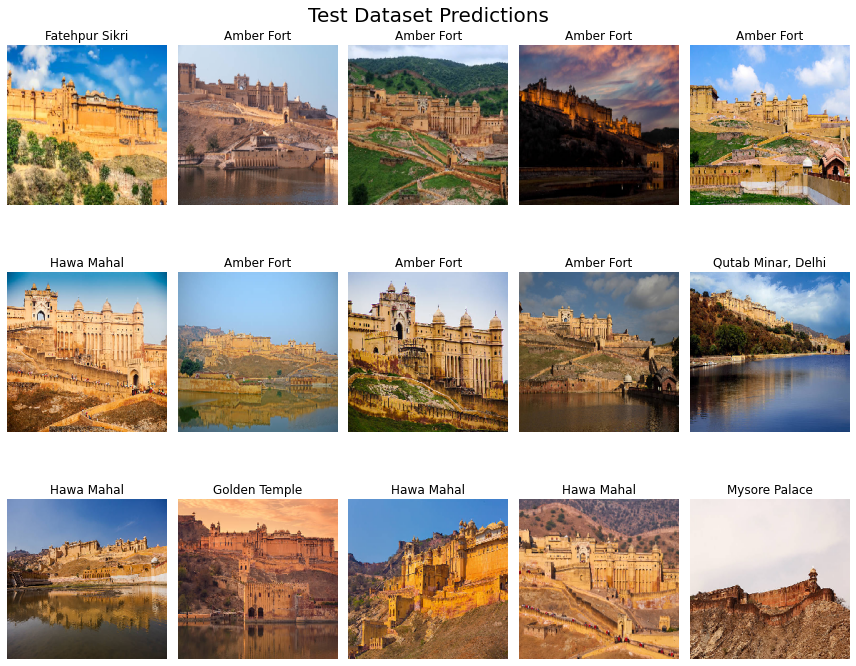

In [49]:
predictions = cnn_model.predict(test_generator)
fig, ax = plt.subplots(nrows=3, ncols=5, figsize=(12, 10))
idx = 0

for i in range(3):
    for j in range(5):
        predicted_label = labels[np.argmax(predictions[idx])]
        ax[i, j].set_title(f"{predicted_label}")
        ax[i, j].imshow(test_generator[0][0][idx])
        ax[i, j].axis("off")
        idx += 1

plt.tight_layout()
plt.suptitle("Test Dataset Predictions", fontsize=20)
plt.show()

In [54]:

predictions = cnn_model.predict(test_generator[10])
predicted_label = labels[np.argmax(predictions[idx])]
predicted_label

ValueError: ignored

In [37]:
test_loss, test_accuracy = cnn_model.evaluate(test_generator, batch_size=BATCH_SIZE)

16/16 [==============================] - 2s 135ms/step - loss: 1.1523 - accuracy: 0.7371


In [38]:
print(f"Test Loss:     {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

Test Loss:     1.152300238609314
Test Accuracy: 0.737051784992218


In [39]:
y_pred = np.argmax(predictions, axis=1)
y_true = test_generator.classes

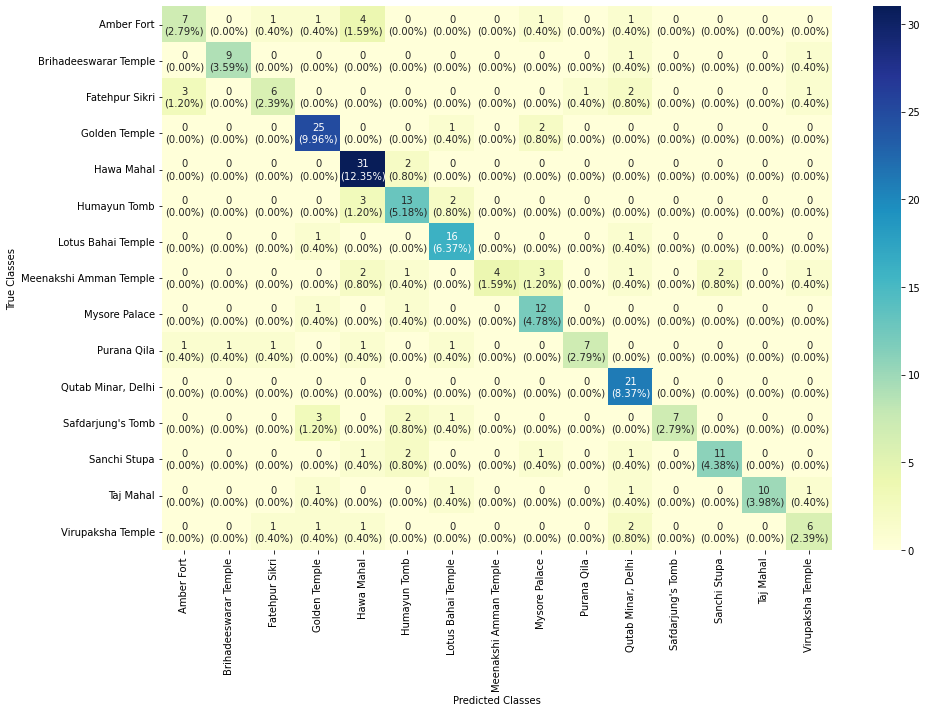

In [76]:
cf_mtx = confusion_matrix(y_true, y_pred)
# print(cf_mtx)
group_counts = ["{0:0.0f}".format(value) for value in cf_mtx.flatten()]
# group_percentages = ["{0:.2%}".format(value) for value in cf_mtx.flatten()/np.sum(cf_mtx)]
box_labels = [f"{v1}\n({v2})" for v1, v2 in zip(group_counts, group_percentages)]
box_labels = np.asarray(box_labels).reshape(15, 15)

plt.figure(figsize = (15, 10))
sns.heatmap(cf_mtx, xticklabels=labels.values(), yticklabels=labels.values(),
           cmap="YlGnBu", fmt="", annot=box_labels)
plt.xlabel('Predicted Classes')
plt.ylabel('True Classes')
plt.show()

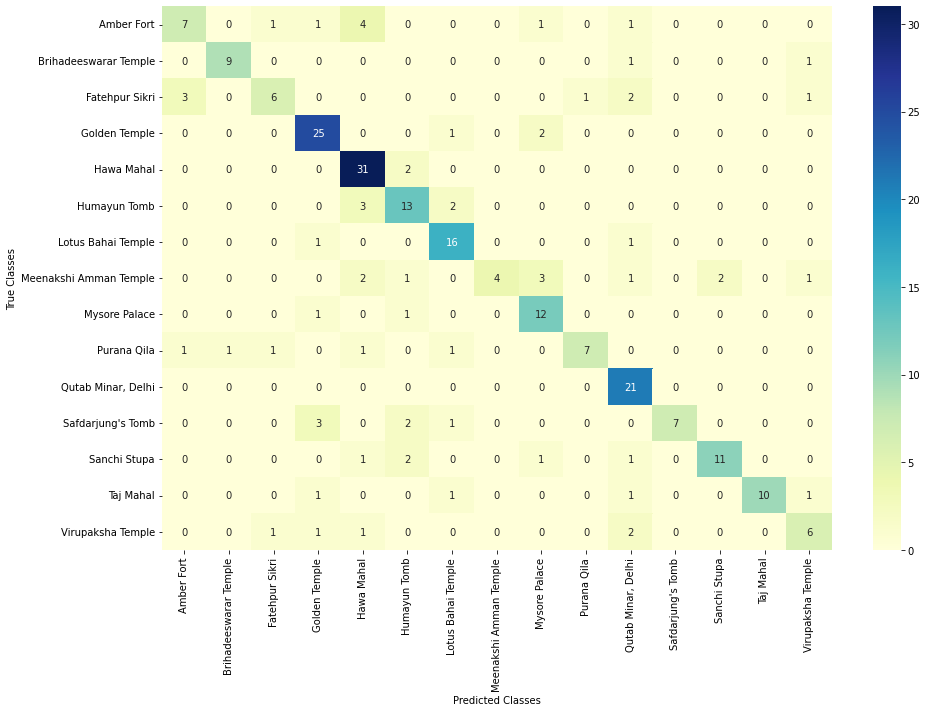

In [78]:
cf_mtx = confusion_matrix(y_true, y_pred)
# print(cf_mtx)
group_counts = ["{0:0.0f}".format(value) for value in cf_mtx.flatten()]
# group_percentages = ["{0:.2%}".format(value) for value in cf_mtx.flatten()/np.sum(cf_mtx)]
box_labels = [f"{v1}" for v1 in group_counts]
box_labels = np.asarray(box_labels).reshape(15, 15)

plt.figure(figsize = (15, 10))
sns.heatmap(cf_mtx, xticklabels=labels.values(), yticklabels=labels.values(),
           cmap="YlGnBu", fmt="", annot=box_labels)
plt.xlabel('Predicted Classes')
plt.ylabel('True Classes')
plt.show()

In [43]:
print(classification_report(y_true, y_pred, target_names=labels.values()))

                        precision    recall  f1-score   support

            Amber Fort       0.64      0.47      0.54        15
 Brihadeeswarar Temple       0.90      0.82      0.86        11
        Fatehpur Sikri       0.67      0.46      0.55        13
         Golden Temple       0.76      0.89      0.82        28
            Hawa Mahal       0.72      0.94      0.82        33
          Humayun Tomb       0.62      0.72      0.67        18
    Lotus Bahai Temple       0.73      0.89      0.80        18
Meenakshi Amman Temple       1.00      0.29      0.44        14
         Mysore Palace       0.63      0.86      0.73        14
           Purana Qila       0.88      0.58      0.70        12
    Qutab Minar, Delhi       0.68      1.00      0.81        21
     Safdarjung's Tomb       1.00      0.54      0.70        13
          Sanchi Stupa       0.85      0.69      0.76        16
             Taj Mahal       1.00      0.71      0.83        14
     Virupaksha Temple       0.60      

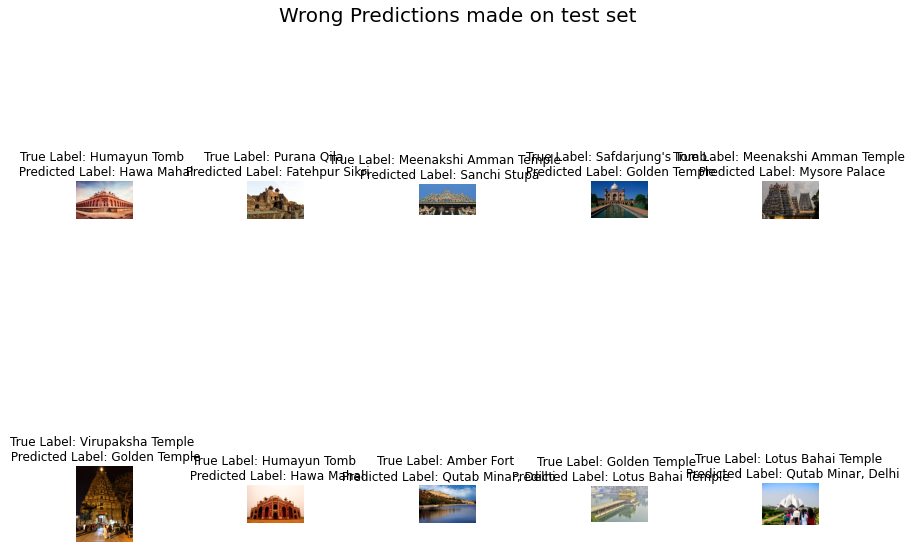

In [45]:
errors = (y_true - y_pred != 0)
y_true_errors = y_true[errors]
y_pred_errors = y_pred[errors]
test_images = test_generator.filenames
test_img = np.asarray(test_images)[errors]
fig, ax = plt.subplots(nrows=2, ncols=5, figsize=(12, 10))
idx = 0

for i in range(2):
    for j in range(5):
        idx = np.random.randint(0, len(test_img))
        true_index = y_true_errors[idx]
        true_label = labels[true_index]
        predicted_index = y_pred_errors[idx]
        predicted_label = labels[predicted_index]
        ax[i, j].set_title(f"True Label: {true_label} \n Predicted Label: {predicted_label}")
        img_path = os.path.join(test_dataset, test_img[idx])
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        ax[i, j].imshow(img)
        ax[i, j].axis("off")

plt.tight_layout()
plt.suptitle('Wrong Predictions made on test set', fontsize=20)
plt.show()

In [84]:
def predictor(img, model):
    actual_name=img.split('/')[-2]
    image = cv2.imread(img)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (224, 224))
    image = np.array(image, dtype = 'float32')/255.0
    plt.imshow(image)
    image = image.reshape(1, 224,224,3)
    
    label_names = train_generator.class_indices
    dict_class = dict(zip(list(range(len(label_names))), label_names))
    clas = model.predict(image).argmax()
    name = dict_class[clas]
    print(f'The given image is of \nActual Label: {actual_name} \nPredicted Label: {name}')

1/1 [==============================] - 0s 37ms/step
The given image is of 
Actual Label: Amber Fort 
Predicted Label: Golden Temple


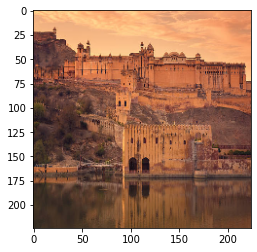

In [98]:
predictor('/content/drive/MyDrive/Monument_Final_Data/test/Amber Fort/gettyimages-636953070-612x612.jpg', cnn_model)